In [2]:
!pip install nba_api

import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np

closed_file = 'NBA PROJECTS.csv'

nba = pd.read_csv(closed_file)

nba = nba.loc[(nba['Tm'] != 'TOT')& (nba['Year'] >= 1990)] 
nba

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9547,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9548,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9549,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9550,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9551,9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [3]:
nba = nba.replace({'Tm':{'WSB':'WAS', 'VAN': 'MEM', 'NJN': 'BRK', 'SEA': 'OKC', 
                         'CHH':'NOP', 'NOH': 'NOP', 'NOK': 'NOP', 'CHO':'CHA' }})
nba["Tm"].unique()


nba.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

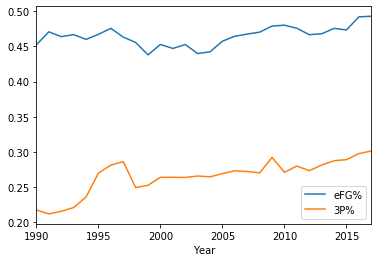

In [27]:
years = nba.groupby(['Year']).mean()
shooting = years[['eFG%', '3P%']]

shooting.plot(kind = 'line')

In [54]:
years[['eFG%', '3P', '3PA', '3P%']]

,eFG%,3P,3PA,3P%
Year,,,,
1990.0,0.452514,11.470309,34.698337,0.217191
1991.0,0.470802,12.180723,38.101205,0.211539
1992.0,0.463962,13.145882,39.760000,0.215209
1993.0,0.466841,15.838480,47.087886,0.220591
1994.0,0.460073,16.443694,49.340090,0.235655
1995.0,0.467238,28.262791,78.811628,0.269659
1996.0,0.475833,28.629857,78.038855,0.281043
1997.0,0.463346,28.146771,78.166341,0.285920
1998.0,0.455668,21.153846,61.196356,0.249085


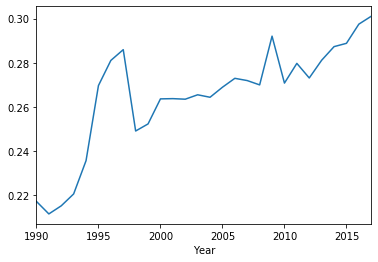

In [5]:
threesyear = years['3P%']

threesyear.plot(kind = 'line')

In [70]:
teams = nba.groupby(['Tm']).mean()

teamshooting = teams[['TS%', '3PA', '3P%', 'eFG%']]

teamshooting = teamshooting.sort_values(['3PA'], ascending = False)
teamshooting

,TS%,3PA,3P%,eFG%
Tm,,,,
HOU,0.514046,94.860370,0.266066,0.477217
LAL,0.507698,87.318182,0.271719,0.468295
IND,0.513224,83.721839,0.265474,0.471228
PHO,0.515472,82.343158,0.287491,0.478081
ORL,0.499448,82.106610,0.263915,0.461870
POR,0.506182,81.926991,0.270613,0.469255
OKC,0.515467,81.663755,0.268080,0.478076
NYK,0.505006,81.471092,0.286791,0.467157
GSW,0.508252,80.433735,0.278297,0.469059


In [7]:
nba.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

(0.8241914625349471, 2.1747037866385124e-08)


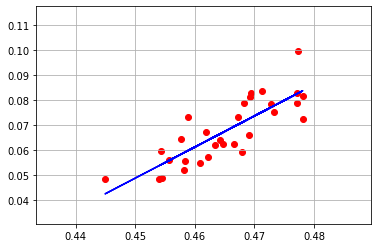

In [8]:
x = teams['eFG%']
y = teams['WS/48']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x, y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = "blue")
plt.grid(b = True)
print(cor)

In [9]:
C  = nba.loc[nba['Pos']== 'C']
SF = nba.loc[nba['Pos']== 'SF']
SG = nba.loc[nba['Pos']== 'SG']
PG = nba.loc[nba['Pos']== 'PG']
PF = nba.loc[nba['Pos']== 'PF']

Cyear = C.groupby(['Year']).sum()
PFyear = PF.groupby(['Year']).sum()
SFyear = SF.groupby(['Year']).sum()
SGyear = SG.groupby(['Year']).sum()
PGyear = PG.groupby(['Year']).sum()


In [10]:
players = ['C', 'PF', "SF", "SG", "PG"]

In [72]:
sharpshooters = nba.loc[nba["3P%"] >= .35]
sharp_year = sharpshooters.groupby(['Year']).count()

C  = sharpshooters.loc[sharpshooters['Pos']== 'C']
SF = sharpshooters.loc[sharpshooters['Pos']== 'SF']
SG = sharpshooters.loc[sharpshooters['Pos']== 'SG']
PG = sharpshooters.loc[sharpshooters['Pos']== 'PG']
PF = sharpshooters.loc[sharpshooters['Pos']== 'PF']

Cyear = C.groupby(['Year']).count()
PFyear = PF.groupby(['Year']).count()
SFyear = SF.groupby(['Year']).count()
SGyear = SG.groupby(['Year']).sum()
PGyear = PG.groupby(['Year']).sum()


PFyear

        

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1991.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
1992.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
1993.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1994.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1995.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
1996.0,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1997.0,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
1998.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


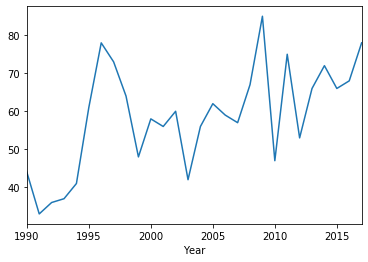

In [47]:
sharp_year.plot(kind = 'line')

In [73]:
sharp_year

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
1991.0,62,62,62,62,62,62,62,62,62,62,...,60,62,62,62,62,62,62,62,62,62
1992.0,78,78,78,78,78,78,78,78,78,78,...,76,78,78,78,78,78,78,78,78,78
1993.0,75,75,75,75,75,75,75,75,75,75,...,74,75,75,75,75,75,75,75,75,75
1994.0,84,84,84,84,84,84,84,84,84,84,...,83,84,84,84,84,84,84,84,84,84
1995.0,126,126,126,126,126,126,126,126,126,126,...,124,126,126,126,126,126,126,126,126,126
1996.0,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
1997.0,161,161,161,161,161,161,161,161,161,161,...,156,161,161,161,161,161,161,161,161,161
1998.0,120,120,120,120,120,120,120,120,120,120,...,117,120,120,120,120,120,120,120,120,120


In [74]:
C  = nba.loc[nba['Pos']== 'C']
SF = nba.loc[nba['Pos']== 'SF']
SG = nba.loc[nba['Pos']== 'SG']
PG = nba.loc[nba['Pos']== 'PG']
PF = nba.loc[nba['Pos']== 'PF']

Cyear = C.groupby(['Year']).sum()
PFyear = PF.groupby(['Year']).sum()
SFyear = SF.groupby(['Year']).sum()
SGyear = SG.groupby(['Year']).sum()
PGyear = PG.groupby(['Year']).sum()


In [ ]:
avg_2017 = years.loc[year]